In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load packages**

In [ ]:
import PIL
import numpy as np
import tensorflow as tf
# load and show an image with Pillow
from PIL import Image
from os import listdir
from sklearn import metrics
import os
import numpy as np
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

## **Load data**

In [ ]:
# load all images in a directory
# load all images in a directory
loaded_images = list()
loaded_images_greyscale = list()
dir_normal = '/content/drive/Shareddrives/520 - Machine Learning Project/Dataset/Normal2/'
dir_covid = '/content/drive/Shareddrives/520 - Machine Learning Project/Dataset/COVID2/'
dir_pneumonia = '/content/drive/Shareddrives/520 - Machine Learning Project/Dataset/Viral_Pneumonia2/'
labels = []

for filename in listdir(dir_normal):
	# load image
	img_data = Image.open(dir_normal + filename)
	loaded_images_greyscale.append(img_data) 
	img_data = img_data.convert("RGB")
	# store loaded image
	loaded_images.append(img_data)
	labels.append(0)
for filename in listdir(dir_covid):
  # load image
	img_data = Image.open(dir_covid + filename)
	loaded_images_greyscale.append(img_data) 
	img_data = img_data.convert("RGB")
	# store loaded image
	loaded_images.append(img_data)
	labels.append(1)
for filename in listdir(dir_pneumonia):
  # load image
	img_data = Image.open(dir_pneumonia + filename).convert('L')
	loaded_images_greyscale.append(img_data) 
	img_data = img_data.convert("RGB")
	# store loaded image
	loaded_images.append(img_data)
	labels.append(2)


In [ ]:
transform1 = transforms.ToTensor()

**Net1 Architecture:\
(1) Fully connected layer (Input size: 299\*299*1, Output size: 32)\
(2) ReLU activation function\
(3) Fully connected layer (Input size: 32, Output size; 1)\
(4) Sigmoid activation function**


In [ ]:
class Net1(torch.nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.linear_1 = torch.nn.Linear(299*299, 32)
        self.linear_2 = torch.nn.Linear(32, 1)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = x.reshape(x.size(0), -1)
        x = self.relu(self.linear_1(x))
        x = self.sigmoid(self.linear_2(x))
        #x = self.linear_3(x)                                    
        return x

**Net2 Architecture:\
Fully connected layer (Input size: 299\*299*1, Output size: 256)\
ReLU activation function\
Dropout (50%)\
Fully connected layer (Input size: 256, Output size: 32)\
ReLU activation function\
Fully connected layer (Input size: 32, Output size; 1)\
Sigmoid activation function**

In [ ]:
class Net2(torch.nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.linear_1 = torch.nn.Linear(299*299, 256)
        self.linear_2 = torch.nn.Linear(256, 32)
        self.linear_3 = torch.nn.Linear(32, 1)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, x):
        x = x.reshape(x.size(0), -1)
        x = self.relu(self.linear_1(x))
        x = self.dropout(x)
        x = self.relu(self.linear_2(x))
        x = self.sigmoid(self.linear_3(x))
        #x = self.linear_3(x)                                    
        return x

**Net3 Architecture:\
Convolutional layer (Input size: 299x299x1, Output size: 100x100x16)\
ReLU activation function\
Fully connected layer (Input size: 100\*100\*16, Output size: 128)\
ReLU activation function\
Dropout (50%)\
Fully connected layer (Input size: 128, Output size; 1)\
Sigmoid activation function**

In [ ]:
class Net3(torch.nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=3, padding=1)
        self.linear_1 = torch.nn.Linear(100*100*16, 128)
        self.linear_2 = torch.nn.Linear(128, 1)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.relu(self.conv_1(x))
        x = x.reshape(x.size(0), -1)
        x = self.relu(self.linear_1(x))
        x = self.dropout(x)
        x = self.sigmoid(self.linear_2(x))                                    

        return x

**Net4 Architecture:\
Convolutional layer (Input size: 299x299x1, Output size: 100x100x8)\
ReLU activation function\
Convolutional layer (Input size: 100x100x8, Output size: 33x33x16)\
ReLU activation function\
Convolutional layer (Input size: 33x33x16, Output size: 34x34x32)\
Max pooling layer (Input size: 34\*34\*32, Output size: 17\*17\*32)\
Fully connected layer (Input size: 17\*17\*32, Output size: 128)\
ReLU activation function\
Dropout (50%)\
Fully connected layer (Input size: 128, Output size; 1)\
Sigmoid activation function**

In [ ]:
class Net4(torch.nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=4, stride=3, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=6, stride=3, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2, stride=1, padding=1)
        self.linear_1 = torch.nn.Linear(17*17*32, 128)
        self.linear_2 = torch.nn.Linear(128, 1)
        self.relu = torch.nn.ReLU()
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.sigmoid = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.relu(self.conv_1(x))
        x = self.relu(self.conv_2(x))
        x = self.relu(self.conv_3(x))
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.relu(self.linear_1(x))
        x = self.dropout(x)
        x = self.sigmoid(self.linear_2(x))                                    

        return x

# **Classifying COVID-19 X-rays**

**Construct train (60%), validation (20%), and test (20%) sets**

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

class DatasetMaper(Dataset):

   def __init__(self, x, y):
      self.x = x
      self.y = y
      
   def __len__(self):
      return len(self.x)
      
   def __getitem__(self, idx):
      return self.x[idx], self.y[idx]

labels1 = np.array(labels)
X = [transform1(loaded_images_greyscale[i]).float() for i in np.where(labels1!=2)[0]]
y = [torch.tensor(labels[i]) for i in np.where(labels1!=2)[0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

train = DatasetMaper(X_train, y_train)
val = DatasetMaper(X_val, y_val)
test = DatasetMaper(X_test, y_test)

# Initialize loaders
trainloader = DataLoader(train, batch_size=32)
valloader = DataLoader(val, batch_size=32)
testloader = DataLoader(test, batch_size=32)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


**Net1 Training**

In [ ]:
torch.random.seed()
epochs = 50
model1 = Net1()
model1.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
#y_pred = []
#y_true = []
#y_pred_val = []
#y_true_val = []
# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    
    model1.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model1(image)
        loss = criterion(y_predicted, label.float())
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
        #pred = np.round(y_predicted.cpu().detach())
        #target = np.round(label.cpu().detach())             
        #y_pred.extend(pred.tolist())
        #y_true.extend(target.tolist()) 

    model1.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model1(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()
            #pred_val = np.round(y_predicted_val.cpu().detach())
            #target_val = np.round(label_val.cpu().detach())             
            #y_pred_val.extend(pred_val.tolist())
            #y_true_val.extend(target_val.tolist())

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)   
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')


epoch: 10, loss: 9.8367
epoch: 20, loss: 2.6592
epoch: 30, loss: 1.9754
epoch: 40, loss: 1.4701
epoch: 50, loss: 1.8168


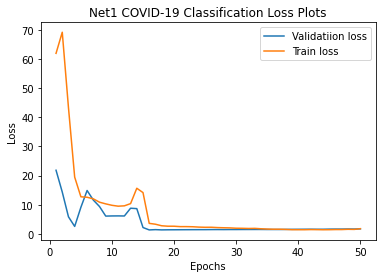

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net1 COVID-19 Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

**Net1 Validation**

In [ ]:
val_pred = []
val_true = []
model1.eval()
with torch.no_grad():
    for image, label in valloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        pred = model1(image)
        pred = np.round(pred.cpu().detach())
        target = np.round(label.cpu().detach())             
        val_pred.extend(pred.tolist())
        val_true.extend(target.tolist())
print("Accuracy for validation set:" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net1 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net1 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net1 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Accuracy for validation set: 0.94
Net1 F1 score for validation set:  0.9387755102040817
Net1 AUC for validation set:  0.9421918908069049
Net1 Sensitivity for validation set:  0.9787234042553191


**Net2 Training**

In [ ]:
torch.random.seed()
epochs = 50
model2 = Net2()
model2.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
#y_pred = []
#y_true = []
#y_pred_val = []
#y_true_val = []

# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model2.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model2(image)
        loss = criterion(y_predicted, label.float())
        #print(loss)
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
        #pred = np.round(y_predicted.cpu().detach())
        #target = np.round(label.cpu().detach())             
        #y_pred.extend(pred.tolist())
        #y_true.extend(target.tolist())
    model2.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model2(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()
            #pred_val = np.round(y_predicted_val.cpu().detach())
            #target_val = np.round(label_val.cpu().detach())             
            #y_pred_val.extend(pred_val.tolist())
            #y_true_val.extend(target_val.tolist())

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)   
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')

epoch: 10, loss: 4.7754
epoch: 20, loss: 4.0808
epoch: 30, loss: 3.8601
epoch: 40, loss: 3.3862
epoch: 50, loss: 3.8182


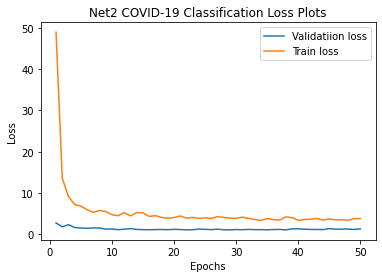

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net2 COVID-19 Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

**Net2 Validation**

In [ ]:
val_pred = []
val_true = []
model2.eval()
with torch.no_grad():
    for image, label in valloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        pred = model2(image)
        pred = np.round(pred.cpu().detach())
        target = np.round(label.cpu().detach())             
        val_pred.extend(pred.tolist())
        val_true.extend(target.tolist())
print("Accuracy for validation set:" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net2 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net2 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net2 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Accuracy for validation set: 0.94
Net2 F1 score for validation set:  0.9387755102040817
Net2 AUC for validation set:  0.9421918908069049
Net2 Sensitivity for validation set:  0.9787234042553191


**Net3 Training**

In [ ]:
torch.random.seed()
epochs = 50
model3 = Net3()
model3.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
#y_pred = []
#y_true = []
#y_pred_val = []
#y_true_val = []
# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model3.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model3(image)
        loss = criterion(y_predicted, label.float())
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
        #pred = np.round(y_predicted.cpu().detach())
        #target = np.round(label.cpu().detach())             
        #y_pred.extend(pred.tolist())
        #y_true.extend(target.tolist())
    model3.eval()
    with torch.no_grad():
      for image_val, label_val in valloader:
          image_val, label_val = image_val.to(device), label_val.to(device)
          label_val = label_val.unsqueeze(1)
          y_predicted_val = model3(image_val)
          val_loss = criterion(y_predicted_val, label_val.float())
          running_loss_val += val_loss.item()
          #pred_val = np.round(y_predicted_val.cpu().detach())
          #target_val = np.round(label_val.cpu().detach())             
          #y_pred_val.extend(pred_val.tolist())
          #y_true_val.extend(target_val.tolist())

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')

epoch: 10, loss: 2.9257
epoch: 20, loss: 2.6567
epoch: 30, loss: 0.9657
epoch: 40, loss: 0.4567
epoch: 50, loss: 0.2898


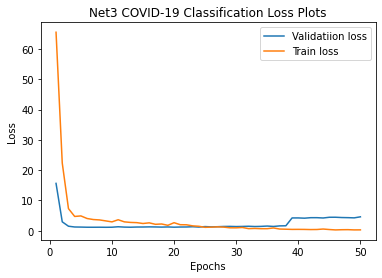

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net3 COVID-19 Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

In [ ]:
torch.random.seed()
epochs = 25
model3 = Net3()
model3.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []

# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model3.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model3(image)
        loss = criterion(y_predicted, label.float())
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
    model3.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model3(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)   
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')

epoch: 10, loss: 3.3689
epoch: 20, loss: 1.9607


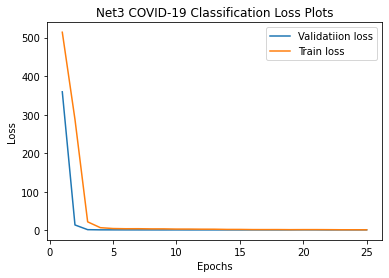

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net3 COVID-19 Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

**Net3 Validation**

In [ ]:
val_pred = []
val_true = []
model3.eval()
with torch.no_grad():
    for image, label in valloader:
      image, label = image.to(device), label.to(device)
      label = label.unsqueeze(1)
      pred = model3(image)
      pred = np.round(pred.cpu().detach())
      target = np.round(label.cpu().detach())             
      val_pred.extend(pred.tolist())
      val_true.extend(target.tolist())
print("Net3 Accuracy for validation set:" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net3 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net3 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net3 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Net3 Accuracy for validation set: 0.945
Net3 F1 score for validation set:  0.9417989417989417
Net3 AUC for validation set:  0.945102368526696
Net3 Sensitivity for validation set:  0.9468085106382979


In [ ]:
torch.random.seed()
epochs = 50
model4 = Net4()
model4.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
#y_pred = []
#y_true = []
#y_pred_val = []
#y_true_val = []
# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model4.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model4(image)
        loss = criterion(y_predicted, label.float())
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
        #pred = np.round(y_predicted.cpu().detach())
        #target = np.round(label.cpu().detach())             
        #y_pred.extend(pred.tolist())
        #y_true.extend(target.tolist()) 
    model4.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model4(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()
            #pred_val = np.round(y_predicted_val.cpu().detach())
            #target_val = np.round(label_val.cpu().detach())             
            #y_pred_val.extend(pred_val.tolist())
            #_true_val.extend(target_val.tolist())

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')

epoch: 10, loss: 4.3134
epoch: 20, loss: 2.9453
epoch: 30, loss: 1.7982
epoch: 40, loss: 1.2267
epoch: 50, loss: 0.6754


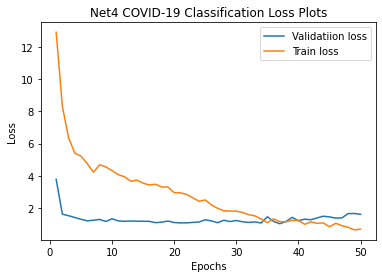

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net4 COVID-19 Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

In [ ]:
torch.random.seed()
epochs = 20
model4 = Net4()
model4.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model4.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model4(image)
        loss = criterion(y_predicted, label.float())
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
    model4.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model4(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')

epoch: 10, loss: 3.0939
epoch: 20, loss: 1.7758


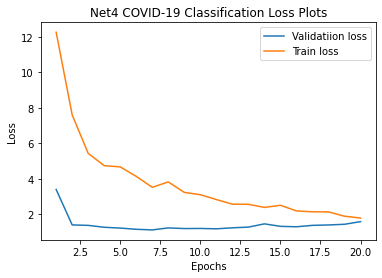

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net4 COVID-19 Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

**Net4 Validation**

In [ ]:
val_pred = []
val_true = []
model4.eval()
with torch.no_grad():
    for image, label in valloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        pred = model4(image)
        pred = np.round(pred.cpu().detach())
        target = np.round(label.cpu().detach())             
        val_pred.extend(pred.tolist())
        val_true.extend(target.tolist())
print("Net4 Accuracy for validation set:" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net4 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net4 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net4 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Net4 Accuracy for validation set: 0.95
Net4 F1 score for validation set:  0.9473684210526315
Net4 AUC for validation set:  0.9504215174628664
Net4 Sensitivity for validation set:  0.9574468085106383


**Net1, Net2, Net3, Net4 Ensemble Validation**

In [ ]:
val_pred = []
val_true = []
model1.eval()
model2.eval()
model3.eval()
model4.eval()
with torch.no_grad():
    for image, label in valloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        pred1 = model1(image)
        pred2 = model2(image)
        pred3 = model3(image)
        pred4 = model4(image)  
        pred = np.round((pred1.cpu().detach()+pred2.cpu().detach()+pred3.cpu().detach()+pred4.cpu().detach())/4)
        target = np.round(label.cpu().detach())             
        val_pred.extend(pred.tolist())
        val_true.extend(target.tolist())
print("Net4 Accuracy for validation set:" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net4 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net4 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net4 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Net4 Accuracy for validation set: 0.945
Net4 F1 score for validation set:  0.9430051813471503
Net4 AUC for validation set:  0.9463067041348856
Net4 Sensitivity for validation set:  0.9680851063829787


**Test set evaluation using model with best performance on validation set (Net4)**

In [ ]:
test_pred = []
test_true = []
model4.eval()
with torch.no_grad():
    for image, label in testloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        pred = model4(image)
        pred = np.round(pred.cpu().detach())
        target = np.round(label.cpu().detach())             
        test_pred.extend(pred.tolist())
        test_true.extend(target.tolist())
print("Ensemble Accuracy for test set:" ,         
sum([test_true[i]==test_pred[i] for i in range(len(test_true))])/(len(test_true)))
print('Ensemble F1 score for test set: ', metrics.f1_score(test_true, test_pred))
print('Net4 AUC for test set: ', metrics.roc_auc_score(test_true, test_pred))
print('Net4 Sensitivity for test set: ', metrics.recall_score(test_true, test_pred))

Ensemble Accuracy for test set: 0.915
Ensemble F1 score for test set:  0.92018779342723
Net4 AUC for test set:  0.9138621794871794
Net4 Sensitivity for test set:  0.9423076923076923


## **Classifying pneumonia X-rays**

**Construct train (60%), validation (20%), and test (20%) sets**

In [ ]:
labels1 = np.array(labels)
labels1[np.where(labels1==1)]=3
labels1[np.where(labels1==2)]=1

X = [transform1(loaded_images_greyscale[i]).float() for i in np.where(labels1!=3)[0]]
y = [torch.tensor(labels1[i]) for i in np.where(labels1!=3)[0]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

train = DatasetMaper(X_train, y_train)
val = DatasetMaper(X_val, y_val)
test = DatasetMaper(X_test, y_test)

# Initialize loaders
trainloader = DataLoader(train, batch_size=32)
valloader = DataLoader(val, batch_size=32)
testloader = DataLoader(test, batch_size=32)

**Net1 Training**

In [ ]:
torch.random.seed()
epochs = 50
model1 = Net1()
model1.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
#y_pred = []
#y_true = []
#y_pred_val = []
#y_true_val = []
# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model1.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model1(image)
        loss = criterion(y_predicted, label.float())
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
        #pred = np.round(y_predicted.cpu().detach())
        #target = np.round(label.cpu().detach())             
        #y_pred.extend(pred.tolist())
        #y_true.extend(target.tolist()) 
    model1.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model1(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()
            #pred_val = np.round(y_predicted_val.cpu().detach())
            #target_val = np.round(label_val.cpu().detach())             
            #y_pred_val.extend(pred_val.tolist())
            #y_true_val.extend(target_val.tolist())

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')


epoch: 10, loss: 7.1415
epoch: 20, loss: 3.7416
epoch: 30, loss: 2.9781
epoch: 40, loss: 2.8282
epoch: 50, loss: 2.9005


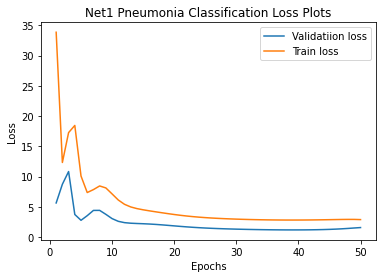

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net1 Pneumonia Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

**Net1 Validation**

In [ ]:
val_pred = []
val_true = []
model1.eval()
with torch.no_grad():
    for image, label in valloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        pred = model1(image)
        pred = np.round(pred.cpu().detach())
        target = np.round(label.cpu().detach())             
        val_pred.extend(pred.tolist())
        val_true.extend(target.tolist())
print("Net1 Accuracy for validation set:" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net1 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net1 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net1 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Net1 Accuracy for validation set: 0.89
Net1 F1 score for validation set:  0.875
Net1 AUC for validation set:  0.8859895624247289
Net1 Sensitivity for validation set:  0.8191489361702128


**Net2 Training**

In [ ]:
torch.random.seed()
epochs = 50
model2 = Net2()
model2.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
#y_pred = []
#y_true = []
#y_pred_val = []
#y_true_val = []

# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model2.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model2(image)
        loss = criterion(y_predicted, label.float())
        #print(loss)
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
        #pred = np.round(y_predicted.cpu().detach())
        #target = np.round(label.cpu().detach())             
        #y_pred.extend(pred.tolist())
        #y_true.extend(target.tolist())
    model2.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model2(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()
            #pred_val = np.round(y_predicted_val.cpu().detach())
            #target_val = np.round(label_val.cpu().detach())             
            #y_pred_val.extend(pred_val.tolist())
            #y_true_val.extend(target_val.tolist())

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')

epoch: 10, loss: 10.5590
epoch: 20, loss: 9.7563
epoch: 30, loss: 9.1425
epoch: 40, loss: 8.8391
epoch: 50, loss: 9.4648


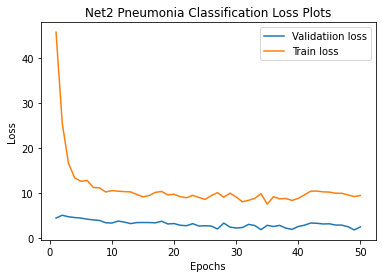

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net2 Pneumonia Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

**Net2 Validation**

In [ ]:
val_pred = []
val_true = []
model2.eval()
with torch.no_grad():
    for image, label in valloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        pred = model2(image)
        pred = np.round(pred.cpu().detach())
        target = np.round(label.cpu().detach())             
        val_pred.extend(pred.tolist())
        val_true.extend(target.tolist())
print("Net2 Accuracy for validation set:" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net2 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net2 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net2 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Net2 Accuracy for validation set: 0.91
Net2 F1 score for validation set:  0.896551724137931
Net2 AUC for validation set:  0.9054596547571256
Net2 Sensitivity for validation set:  0.8297872340425532


**Net3 Training**

In [ ]:
torch.random.seed()
epochs = 50
model3 = Net3()
model3.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
#y_pred = []
#y_true = []
#y_pred_val = []
#y_true_val = []
# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model3.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model3(image)
        loss = criterion(y_predicted, label.float())
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
        #pred = np.round(y_predicted.cpu().detach())
        #target = np.round(label.cpu().detach())             
        #y_pred.extend(pred.tolist())
        #y_true.extend(target.tolist())
    model3.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model3(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()
            #pred_val = np.round(y_predicted_val.cpu().detach())
            #target_val = np.round(label_val.cpu().detach())             
            #y_pred_val.extend(pred_val.tolist())
            #y_true_val.extend(target_val.tolist())

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')

epoch: 10, loss: 3.2759
epoch: 20, loss: 2.0326
epoch: 30, loss: 1.5984
epoch: 40, loss: 0.8694
epoch: 50, loss: 0.3864


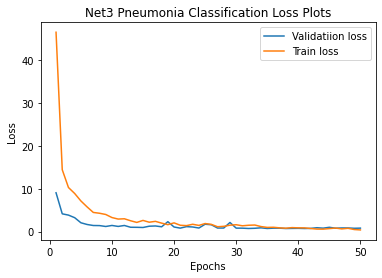

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net3 Pneumonia Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

**Net3 Validation**

In [ ]:
val_pred = []
val_true = []
model3.eval()
with torch.no_grad():
    for image, label in valloader:
      image, label = image.to(device), label.to(device)
      label = label.unsqueeze(1)
      pred = model3(image)
      pred = np.round(pred.cpu().detach())
      target = np.round(label.cpu().detach())             
      val_pred.extend(pred.tolist())
      val_true.extend(target.tolist())
print("Net3 Accuracy for validation set is" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net3 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net3 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net3 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Net3 Accuracy for validation set is 0.965
Net3 F1 score for validation set:  0.9625668449197862
Net3 AUC for validation set:  0.9645724608590928
Net3 Sensitivity for validation set:  0.9574468085106383


**Net4 Training**

In [ ]:
torch.random.seed()
epochs = 50
model4 = Net4()
model4.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-3) 
train_loss = []
val_loss_list = []
#y_pred = []
#y_true = []
#y_pred_val = []
#y_true_val = []
# traing iteration
for epoch in range(epochs):
    running_loss = 0
    running_loss_val = 0
    model4.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        # zero gradient
        optimizer.zero_grad()
        # forward path
        y_predicted = model4(image)
        loss = criterion(y_predicted, label.float())
        running_loss += loss.item()
        # backpropagating
        loss.backward()
        # optimizes the weights
        optimizer.step()
        #pred = np.round(y_predicted.cpu().detach())
        #target = np.round(label.cpu().detach())             
        #y_pred.extend(pred.tolist())
        #y_true.extend(target.tolist()) 
    model4.eval()
    with torch.no_grad():
        for image_val, label_val in valloader:
            image_val, label_val = image_val.to(device), label_val.to(device)
            label_val = label_val.unsqueeze(1)
            y_predicted_val = model4(image_val)
            val_loss = criterion(y_predicted_val, label_val.float())
            running_loss_val += val_loss.item()
            #pred_val = np.round(y_predicted_val.cpu().detach())
            #target_val = np.round(label_val.cpu().detach())             
            #y_pred_val.extend(pred_val.tolist())
            #y_true_val.extend(target_val.tolist())

    val_loss_list.append(running_loss_val)
    train_loss.append(running_loss)
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')

epoch: 10, loss: 3.2480
epoch: 20, loss: 1.0097
epoch: 30, loss: 0.8829
epoch: 40, loss: 0.1206
epoch: 50, loss: 0.0161


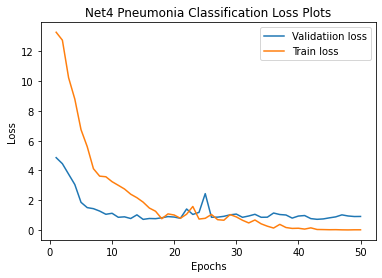

In [ ]:
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validatiion loss")
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Net4 Pneumonia Classification Loss Plots")
plt.legend(loc='upper right')
plt.show()

In [ ]:
val_pred = []
val_true = []
model4.eval()
with torch.no_grad():
    for image, label in valloader:
      image, label = image.to(device), label.to(device)
      label = label.unsqueeze(1)
      pred = model4(image)
      pred = np.round(pred.cpu().detach())
      target = np.round(label.cpu().detach())             
      val_pred.extend(pred.tolist())
      val_true.extend(target.tolist())
print("Net4 Accuracy for validation set is" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net4 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net4 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net4 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Net4 Accuracy for validation set is 0.955
Net4 F1 score for validation set:  0.9518716577540107
Net4 AUC for validation set:  0.954536330790847
Net4 Sensitivity for validation set:  0.9468085106382979


**Net1, Net2, Net3, Net4 Ensemble Validation**

In [ ]:
val_pred = []
val_true = []
model1.eval()
model2.eval()
model3.eval()
model4.eval()
with torch.no_grad():
    for image, label in valloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        pred1 = model1(image)
        pred2 = model2(image)
        pred3 = model3(image)
        pred4 = model4(image)  
        pred = np.round((pred1.cpu().detach()+pred2.cpu().detach()+pred3.cpu().detach()+pred4.cpu().detach())/4)
        target = np.round(label.cpu().detach())             
        val_pred.extend(pred.tolist())
        val_true.extend(target.tolist())
print("Net4 Accuracy for validation set:" ,         
sum([val_true[i]==val_pred[i] for i in range(len(val_true))])/(len(val_true)))
print('Net4 F1 score for validation set: ', metrics.f1_score(val_true, val_pred))
print('Net4 AUC for validation set: ', metrics.roc_auc_score(val_true, val_pred))
print('Net4 Sensitivity for validation set: ', metrics.recall_score(val_true, val_pred))

Net4 Accuracy for validation set: 0.95
Net4 F1 score for validation set:  0.9456521739130436
Net4 AUC for validation set:  0.9486150140505821
Net4 Sensitivity for validation set:  0.925531914893617


**Test set evaluation using model with best performance on validation set (Net3)**

In [ ]:
test_pred = []
test_true = []
model3.eval()
with torch.no_grad():
    for image, label in testloader:
        image, label = image.to(device), label.to(device)
        label = label.unsqueeze(1)
        model3.eval()
        pred = model3(image)
        pred = np.round(pred.cpu().detach())
        target = np.round(label.cpu().detach())             
        test_pred.extend(pred.tolist())
        test_true.extend(target.tolist())
print("Accuracy on test set is" ,         
sum([test_true[i]==test_pred[i] for i in range(len(test_true))])/(len(test_true)))
print('F1 score: ', metrics.f1_score(test_true, test_pred))
print('AUC: ', metrics.roc_auc_score(test_true, test_pred))
print('Sensitivity: ', metrics.recall_score(test_true, test_pred))

Accuracy on test set is 0.945
F1 score:  0.9463414634146341
AUC:  0.9455128205128206
Sensitivity:  0.9326923076923077
